In [64]:
%load_ext lab_black

from puzzles import load_lines

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [65]:
import numpy as np

In [67]:
s = sorted(load_lines(7))[0]
s

'bright aqua bags contain 2 faded silver bags, 5 dim fuchsia bags.'

In [68]:
def explode_bags_line(s):
    which, what = s.split(" contain ")
    what = [x.split(" ", 1) for x in what[:-1].split(", ")]
    return which, what

In [84]:
index = []
for line in load_lines(7):
    what, which = explode_bags_line(line)
    index.append(what)
    index.extend([c[1] for c in which])
index = sorted(set(index))

In [85]:
W = np.zeros([len(index), len(index)], dtype=int)

for line in load_lines(7):
    what, which = explode_bags_line(line)
    for cnt, bags in which:
        if cnt == "no":
            continue
        W[index.index(what), index.index(bags)] = int(cnt)

In [91]:
df = pd.DataFrame(W, index=index, columns=index)

In [92]:
a = df.loc[:, "shiny yellow bags"]
mask = a > 0

In [108]:
v = df.loc[mask].iloc[0]
(v > 0).sum()

3

In [110]:
v[v > 0]

bright yellow bags    4
shiny indigo bag      1
shiny yellow bags     2
Name: shiny olive bags, dtype: int64

<AxesSubplot:>

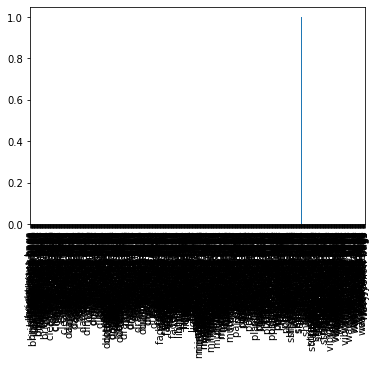

In [99]:
(mask * 1).plot.bar()

,bright aqua bags,bright beige bags,bright black bags,bright blue bag,bright blue bags,bright bronze bags,bright brown bags,bright chartreuse bag,bright chartreuse bags,bright coral bags,...,wavy tan bags,wavy teal bag,wavy teal bags,wavy tomato bags,wavy turquoise bag,wavy turquoise bags,wavy violet bag,wavy violet bags,wavy white bags,wavy yellow bags
shiny olive bags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
erase_s = lambda s: s if not s.endswith("s") else s[:-1]

s = set()

for line in load_lines(7):
    if "contain no other bags" in line:
        what, _ = line[:-1].split(" contain ")
        what = erase_s(what)
        s.add(what)
        continue

    what, contents = line[:-1].split(" contain ")
    contents = [erase_s(" ".join(c.split()[1:])) for c in contents.split(", ")]
    what = erase_s(what)
    s.add(what)
    [s.add(c) for c in contents]

labels = sorted(s)
W = np.zeros([len(s), len(s)], dtype=np.uint8)

for line in load_lines(7):
    if "contain no other bags" in line:
        what, _ = line[:-1].split(" contain ")
        what = erase_s(what)
        s.add(what)
        continue

    what, contents = line[:-1].split(" contain ")
    contents = [
        (int(c.split()[0]), erase_s(" ".join(c.split()[1:])))
        for c in contents.split(", ")
    ]
    what = erase_s(what)

    i = labels.index(what)
    for t, c in contents:
        j = labels.index(c)
        W[i, j] = t

In [59]:
df = pd.DataFrame(W, index=labels, columns=labels)

In [63]:
a = df.loc[:, "shiny yellow bag"]
a[a > 0]

shiny olive bag    2
Name: shiny yellow bag, dtype: uint8

In [57]:
s = set()

v = W[:, labels.index("shiny yellow bag")]
queue = np.where(v > 0)[0].tolist()

total = set(queue)

while len(queue) > 0:
    n = queue.pop(0)
    v = W[:, n]
    a = np.where(v > 0)[0].tolist()
    queue.extend(a)
    total = total.union(set(a))
len(total)

4

494

In [28]:
queue = [473]

total = set()
while len(queue) > 0:
    row = W[queue.pop(0)]
    total = total.union(set(np.where(row > 0)[0]))
    queue.extend(list(np.where(row > 0)[0]))
len(total)

20

Не 20 и не 41

In [14]:
(W[473] > 0).sum()

4

In [17]:
np.where(W[473] > 0)[0]

array([ 75,  90, 204, 583])